# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("Output Data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Data

### Generate Random Cities

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of 1500 random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Run a test call to view JSON structure
url = "http://api.openweathermap.org/data/2.5/weather?"
town = "Lisbon"
query_url = f"{url}q={town}&appid={weather_api_key}"
response = requests.get(query_url).json()
response

{'coord': {'lon': -9.1333, 'lat': 38.7167},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 288.47,
  'feels_like': 287.99,
  'temp_min': 287.35,
  'temp_max': 289.73,
  'pressure': 1018,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 7.72, 'deg': 350},
 'clouds': {'all': 20},
 'dt': 1622672803,
 'sys': {'type': 1,
  'id': 6901,
  'country': 'PT',
  'sunrise': 1622610803,
  'sunset': 1622663763},
 'timezone': 3600,
 'id': 2267057,
 'name': 'Lisbon',
 'cod': 200}

In [4]:
# Basic API call URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create empty lists to hold data from API calls
call_city = []
call_city_num = []
lat = []
long = []
temp = []
humid = []
cloudy = []
wind_sp = []

# Perform API calls using random cities generated
# Append data for each city to the relevant list
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    try:
        name = response['name']
        id_num = response['id']
        call_city.append(response['name'])
        call_city_num.append(response['id'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_sp.append(response['wind']['speed'])
        print(f"{name}, ID {id_num} has been located.")
    
    except:
        pass

Havre-St-Pierre, ID 5972291 has been located.
Jamestown, ID 5122534 has been located.
Dzierżoniów, ID 3099828 has been located.
Qaanaaq, ID 3831208 has been located.
Hobart, ID 2163355 has been located.
Rikitea, ID 4030556 has been located.
Yulara, ID 6355222 has been located.
Punta Arenas, ID 3874787 has been located.
Hermanus, ID 3366880 has been located.
Carnarvon, ID 2074865 has been located.
Upernavik, ID 3418910 has been located.
Severo-Kuril'sk, ID 2121385 has been located.
Lompoc, ID 5367788 has been located.
Mataura, ID 6201424 has been located.
Ushuaia, ID 3833367 has been located.
Chui, ID 3443061 has been located.
Hilo, ID 5855927 has been located.
Dagana, ID 2246550 has been located.
Nikolskoye, ID 546105 has been located.
Lebu, ID 3883457 has been located.
Barrow, ID 5880054 has been located.
Avera, ID 4231997 has been located.
Albany, ID 5106841 has been located.
Cabo San Lucas, ID 3985710 has been located.
Rutana Province, ID 434147 has been located.
Kieta, ID 2094027 h

Ekhabi, ID 2122614 has been located.
Tahe, ID 2034615 has been located.
Vao, ID 2137773 has been located.
Hambantota, ID 1244926 has been located.
Miramar, ID 4164601 has been located.
Liezen, ID 2772480 has been located.
Bandarbeyla, ID 64814 has been located.
Pasaquina, ID 3584140 has been located.
Khatanga, ID 2022572 has been located.
Leningradskiy, ID 2123814 has been located.
Marsh Harbour, ID 3571913 has been located.
Gwadar, ID 1177446 has been located.
Amga, ID 2027786 has been located.
Ilulissat, ID 3423146 has been located.
Baghlan, ID 1147540 has been located.
Saint-Paul, ID 935221 has been located.
Pangody, ID 1495626 has been located.
Arman', ID 2127060 has been located.
Labuan, ID 1733782 has been located.
San Patricio, ID 4726521 has been located.
Bangassou, ID 240498 has been located.
Batagay, ID 2027044 has been located.
Iracoubo, ID 3381428 has been located.
Viedma, ID 3832899 has been located.
Sulphur, ID 4342816 has been located.
Hoquiam, ID 5797693 has been locate

Hastings, ID 2647356 has been located.
Emirdağ, ID 315621 has been located.
Svolvær, ID 3135020 has been located.
Trelew, ID 3833883 has been located.
Vanimo, ID 2084442 has been located.
Quatre Cocos, ID 1106643 has been located.
Gemeente Zeewolde, ID 2743996 has been located.
Mazatlán, ID 3996322 has been located.
Muhafazat Lahij, ID 6201197 has been located.
Morki, ID 525262 has been located.
Chabahar, ID 1161724 has been located.
Muroto-misakicho, ID 1856392 has been located.
Nioro, ID 2412408 has been located.
Chipinge, ID 893549 has been located.
Ostrovnoy, ID 556268 has been located.
Gold Coast, ID 2165087 has been located.
Sawtell, ID 2150163 has been located.
Adrar, ID 2381972 has been located.
Shitanjing, ID 1794971 has been located.
Vangaindrano, ID 1054329 has been located.
Qinhuangdao, ID 1797595 has been located.
Makaha, ID 5850511 has been located.
Port Keats, ID 2063039 has been located.
Nemuro, ID 2128975 has been located.
Rome, ID 5134295 has been located.
Rosetta, ID

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create a dataframe from weather data lists
df = pd.DataFrame(list(zip(call_city, call_city_num, lat, long, temp, humid, cloudy, wind_sp)),
                 columns = ['City', 'City ID', 'Latitude', 'Longitude', 'Temperature (k)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (m/sec)'])
df

,City,City ID,Latitude,Longitude,Temperature (k),Humidity (%),Cloudiness (%),Wind Speed (m/sec)
0,Havre-St-Pierre,5972291,50.2334,-63.5986,286.35,62,1,9.26
1,Jamestown,5122534,42.0970,-79.2353,291.99,68,90,3.60
2,Dzierżoniów,3099828,50.7282,16.6514,283.23,87,15,1.07
3,Qaanaaq,3831208,77.4840,-69.3632,270.80,83,99,1.48
4,Hobart,2163355,-42.8794,147.3294,283.56,77,0,0.45
...,...,...,...,...,...,...,...,...
549,Joensuu,655808,62.6012,29.7632,283.65,77,0,2.17
550,Ashland,5146062,40.8167,-82.2665,290.66,94,100,3.98
551,Rodolfo Sánchez Taboada,3996737,31.7167,-116.5667,294.32,76,51,2.24
552,Weiser,5611730,44.2510,-116.9693,310.16,21,8,1.83


In [11]:
# Send dataframe to CSV file
df.to_csv(output_data_file, index=False)

## Inspect Data
----
###  Remove Cities where Humidity > 100%
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Ensure no cities have humidity values > 100%
df.sort_values('Humidity (%)')

,City,City ID,Latitude,Longitude,Temperature (k),Humidity (%),Cloudiness (%),Wind Speed (m/sec)
91,Kingman,5301067,35.1894,-114.0530,310.49,5,1,3.13
475,Bilma,2446796,18.6853,12.9164,305.83,9,7,2.41
367,Saint George,5546220,37.1041,-113.5841,312.13,9,1,1.34
492,Araouane,2460954,18.9048,-3.5265,310.14,9,6,2.47
404,Guadalupe Victoria,3979505,32.2869,-115.1050,313.45,10,81,7.56
...,...,...,...,...,...,...,...,...
408,Paka,1734313,4.6374,103.4368,297.11,100,90,2.59
165,Pangnirtung,6096551,66.1451,-65.7125,273.15,100,90,3.09
163,Kingaroy,2161376,-26.5333,151.8333,286.17,100,75,1.54
280,Vestmanna,2610343,62.1564,-7.1664,281.66,100,90,0.29


### Convert Data Units

In [21]:
# Convert Kelvin temps to Fahrenheit temps
df['Temperature (F)'] = (df['Temperature (k)'] - 273.15) * 9/5 + 32

# Convert wind speed in meters per sec to MPH
df['Wind Speed (mph)'] = (df['Wind Speed (m/sec)'] * 2.237)

df

,City,City ID,Latitude,Longitude,Temperature (k),Humidity (%),Cloudiness (%),Wind Speed (m/sec),Temperature (F),Wind Speed (mph)
0,Havre-St-Pierre,5972291,50.2334,-63.5986,286.35,62,1,9.26,55.760,20.71462
1,Jamestown,5122534,42.0970,-79.2353,291.99,68,90,3.60,65.912,8.05320
2,Dzierżoniów,3099828,50.7282,16.6514,283.23,87,15,1.07,50.144,2.39359
3,Qaanaaq,3831208,77.4840,-69.3632,270.80,83,99,1.48,27.770,3.31076
4,Hobart,2163355,-42.8794,147.3294,283.56,77,0,0.45,50.738,1.00665
...,...,...,...,...,...,...,...,...,...,...
549,Joensuu,655808,62.6012,29.7632,283.65,77,0,2.17,50.900,4.85429
550,Ashland,5146062,40.8167,-82.2665,290.66,94,100,3.98,63.518,8.90326
551,Rodolfo Sánchez Taboada,3996737,31.7167,-116.5667,294.32,76,51,2.24,70.106,5.01088
552,Weiser,5611730,44.2510,-116.9693,310.16,21,8,1.83,98.618,4.09371


## Plot the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

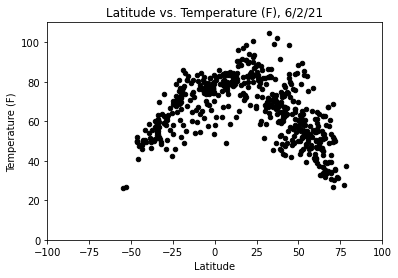

<Figure size 432x288 with 0 Axes>

In [29]:
# Create scatter plot comparing latitude to temperature
df.plot(kind='scatter',x='Latitude',y='Temperature (F)',color='black')
plt.title('Latitude vs. Temperature (F), 6/2/21')
plt.xlim(-100, 100)
plt.ylim(0, 110)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("Output Data", "lat_temp_scatter.png")

# Save chart as image
plt.savefig(image_path)

### Latitude vs. Humidity Plot

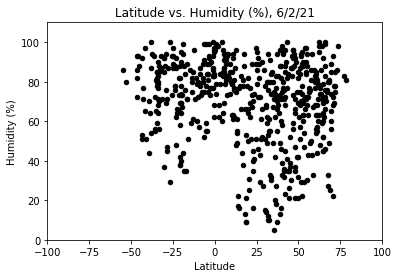

<Figure size 432x288 with 0 Axes>

In [30]:
# Create scatter plot comparing latitude to humidity
df.plot(kind='scatter',x='Latitude',y='Humidity (%)',color='black')
plt.title('Latitude vs. Humidity (%), 6/2/21')
plt.xlim(-100, 100)
plt.ylim(0, 110)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("Output Data", "lat_humid_scatter.png")

# Save chart as image
plt.savefig(image_path)

### Latitude vs. Cloudiness Plot

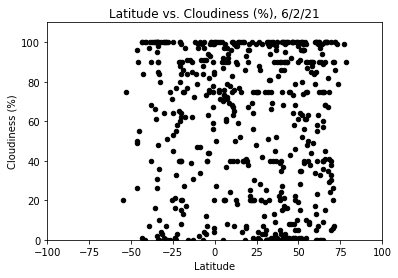

<Figure size 432x288 with 0 Axes>

In [31]:
# Create scatter plot comparing latitude to cloudiness
df.plot(kind='scatter',x='Latitude',y='Cloudiness (%)',color='black')
plt.title('Latitude vs. Cloudiness (%), 6/2/21')
plt.xlim(-100, 100)
plt.ylim(0, 110)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("Output Data", "lat_cloud_scatter.png")

# Save chart as image
plt.savefig(image_path)

### Latitude vs. Wind Speed Plot

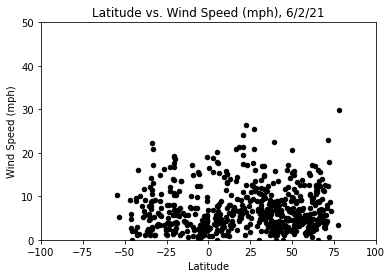

<Figure size 432x288 with 0 Axes>

In [32]:
# Create scatter plot comparing latitude to wind speed
df.plot(kind='scatter',x='Latitude',y='Wind Speed (mph)',color='black')
plt.title('Latitude vs. Wind Speed (mph), 6/2/21')
plt.xlim(-100, 100)
plt.ylim(0, 50)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("Output Data", "lat_wind_scatter.png")

# Save chart as image
plt.savefig(image_path)

## Linear Regression

### Divide Cities into Hemispheres

In [40]:
# Assign N/S hemisphere variable
df['Hemisphere'] = np.where(df['Latitude'] < 0, "Southern", "Northern")
df

,City,City ID,Latitude,Longitude,Temperature (k),Humidity (%),Cloudiness (%),Wind Speed (m/sec),Temperature (F),Wind Speed (mph),Hemisphere
0,Havre-St-Pierre,5972291,50.2334,-63.5986,286.35,62,1,9.26,55.760,20.71462,Northern
1,Jamestown,5122534,42.0970,-79.2353,291.99,68,90,3.60,65.912,8.05320,Northern
2,Dzierżoniów,3099828,50.7282,16.6514,283.23,87,15,1.07,50.144,2.39359,Northern
3,Qaanaaq,3831208,77.4840,-69.3632,270.80,83,99,1.48,27.770,3.31076,Northern
4,Hobart,2163355,-42.8794,147.3294,283.56,77,0,0.45,50.738,1.00665,Southern
...,...,...,...,...,...,...,...,...,...,...,...
549,Joensuu,655808,62.6012,29.7632,283.65,77,0,2.17,50.900,4.85429,Northern
550,Ashland,5146062,40.8167,-82.2665,290.66,94,100,3.98,63.518,8.90326,Northern
551,Rodolfo Sánchez Taboada,3996737,31.7167,-116.5667,294.32,76,51,2.24,70.106,5.01088,Northern
552,Weiser,5611730,44.2510,-116.9693,310.16,21,8,1.83,98.618,4.09371,Northern


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression